In [2]:
import scipy.io
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.decomposition import PCA
import numpy as np
from scipy.stats import spearmanr
import joblib

In [3]:
feature = scipy.io.loadmat(r"C:\Users\汪杰鸣\feature_selection\data\GQ_15Ah_15997_10s\HIs.mat")
label = scipy.io.loadmat(r"C:\Users\汪杰鸣\feature_selection\data\GQ_15Ah_15997_10s\Q_label.mat")

In [4]:
feature = feature['feature']
label = label['label']

In [5]:
if np.any(np.isnan(feature)) or np.any(np.isinf(feature)):
    print("数据存在异常")

数据存在异常


In [6]:
# 数据清洗
mask = np.isnan(feature).any(axis=1) | np.isinf(feature).any(axis=1)
feature = feature[~mask]
label = label[~mask]

In [7]:
if np.any(np.isnan(feature)) or np.any(np.isinf(feature)):
    print("数据存在异常")

In [8]:
feature_scaler = StandardScaler()

# 对特征数据进行标准化处理
feature = feature_scaler.fit_transform(feature)

# 创建标签标准化器
label_scaler = StandardScaler()

# 对标签数据进行标准化处理
label = label_scaler.fit_transform(label.reshape(-1, 1))

In [9]:
# 创建特征标准化器
feature_scaler = StandardScaler()
# 对特征数据进行标准化处理
feature = feature_scaler.fit_transform(feature)

# 创建特征归一化器
feature_normalizer = MinMaxScaler()
# 对特征数据进行归一化处理
feature = feature_normalizer.fit_transform(feature)

# 创建标签标准化器
label_scaler = StandardScaler()
# 对标签数据进行标准化处理
label = label_scaler.fit_transform(label.reshape(-1, 1))

# 创建标签归一化器
label_normalizer = MinMaxScaler()
# 对标签数据进行归一化处理
label = label_normalizer.fit_transform(label)

In [10]:
joblib.dump(label_scaler, 'label_scaler.joblib')
joblib.dump(label_normalizer, 'label_normalizer.joblib')

['label_normalizer.joblib']

In [9]:
if np.any(np.isnan(feature)) or np.any(np.isinf(feature)):
    print("数据存在异常")

In [10]:
# lasso回归进行特征选优
lasso = Lasso(alpha=0.001) # 正则化参数确定
lasso.fit(feature,label)
selected_feature = np.where(lasso.coef_ != 0)[0]

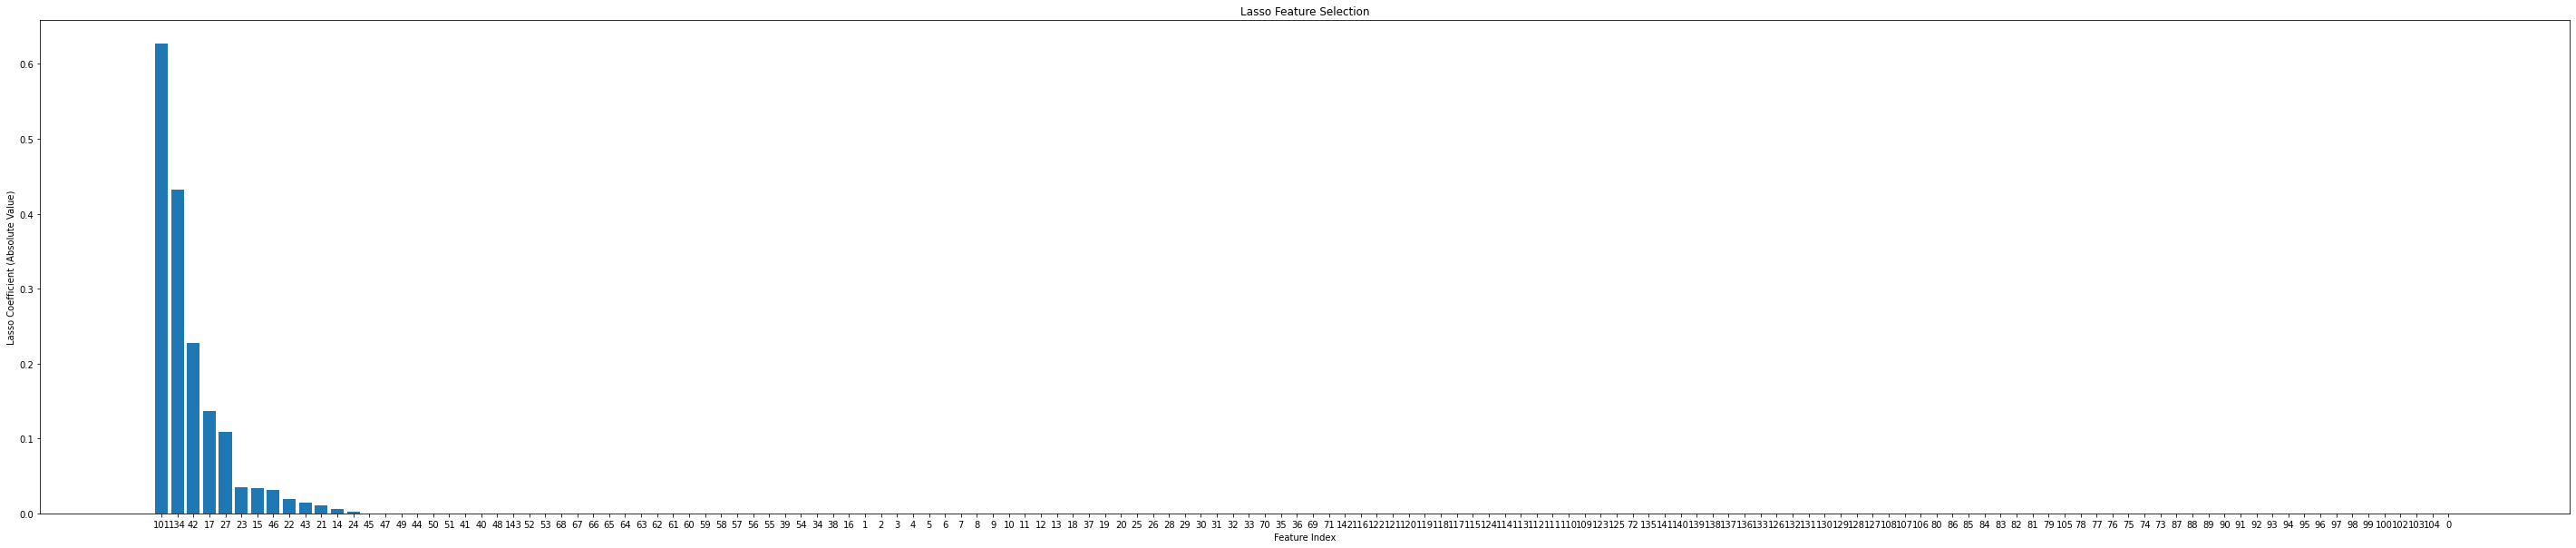

In [11]:
# 选优可视化
lasso_coef = np.abs(lasso.coef_)

# 对Lasso系数进行降序排序
sorted_indices = np.argsort(lasso_coef)[::-1]  
sorted_coef = lasso_coef[sorted_indices]

# 绘制 Lasso 系数的绝对值图
plt.figure(figsize=(50, 10))
plt.bar(range(len(lasso_coef)), sorted_coef)  # 使用排序后的系数值
plt.xticks(range(len(lasso_coef)), sorted_indices)  # 使用排序后的索引作为刻度
plt.xlabel('Feature Index')
plt.ylabel('Lasso Coefficient (Absolute Value)')
plt.title('Lasso Feature Selection')
plt.show()

In [12]:
print(selected_feature)
print(len(selected_feature))

[ 14  15  17  21  22  23  24  27  42  43  46 101 134]
13


In [13]:
feature_lasso = feature[:,selected_feature]

In [32]:
save_path = r'C:\Users\汪杰鸣\feature_selection\data\feature_lasso_1.npy'
np.save(save_path, feature_lasso)

In [33]:
label_path = r'C:\Users\汪杰鸣\feature_selection\data\label_1.npy'
np.save(label_path,label)

In [14]:
data_2 = np.hstack((feature_lasso,label))

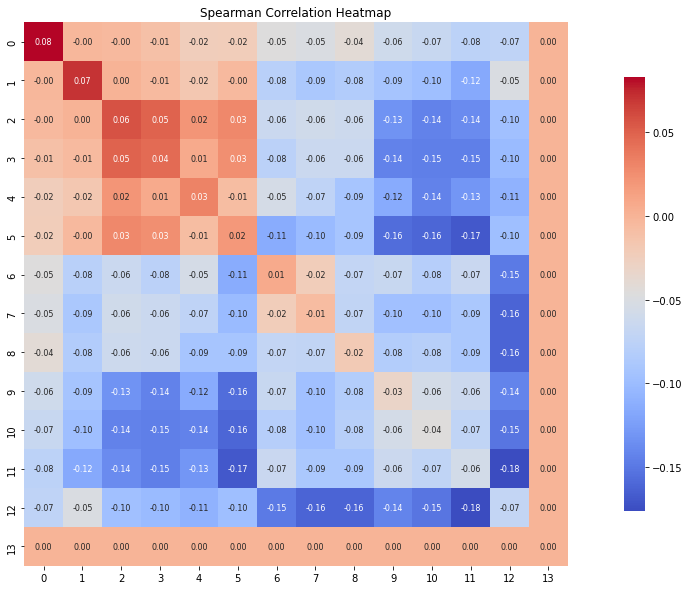

In [30]:
# 提取前13个特征及最后的标签
features = data_2[:, :13]
label = data_2[:, -1]

# 计算Spearman相关系数矩阵
correlation_matrix = np.corrcoef(features, label, rowvar=False)
spearman_corr = np.zeros_like(correlation_matrix)
n = correlation_matrix.shape[0] - 1

for i in range(n):
    for j in range(n):
        spearman_corr[i, j] = (correlation_matrix[i, j] * n - i - j) / (n * (n - 1))

# 绘制热力图
plt.figure(figsize=(20, 10))
sns.heatmap(spearman_corr, cmap='coolwarm', annot=True, fmt='.2f', square=True,
            annot_kws={"fontsize": 8}, cbar_kws={"shrink": 0.8})
plt.title('Spearman Correlation Heatmap')
plt.show()

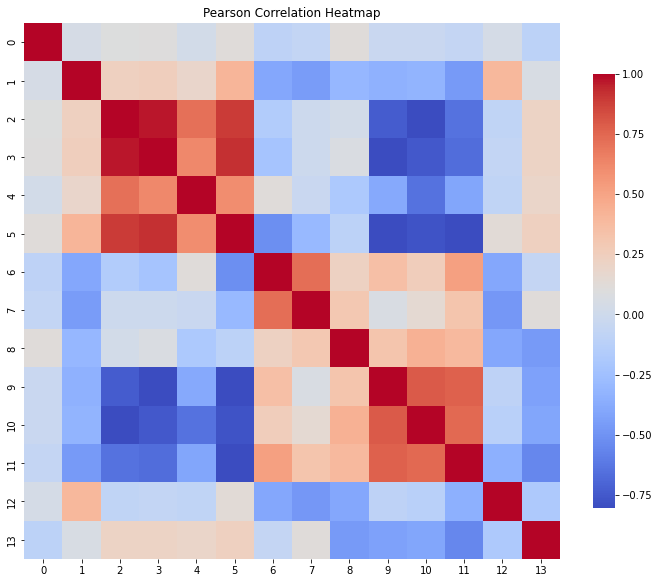

In [15]:
# 提取前13个特征及最后的标签
features = data_2[:, :13]
label = data_2[:, -1]

# 计算皮尔逊相关系数矩阵
correlation_matrix = np.corrcoef(features, label, rowvar=False)

# 绘制热力图
# 绘制热力图
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt='.2f', square=True,
            annot_kws={"fontsize": 8}, cbar_kws={"shrink": 0.8})
plt.title('Pearson Correlation Heatmap')
plt.show()